 [3.4]选择iris数据集，比较10折交叉验证和留一法的错误率。

In [102]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlinebackend.figure_format = 'svg'

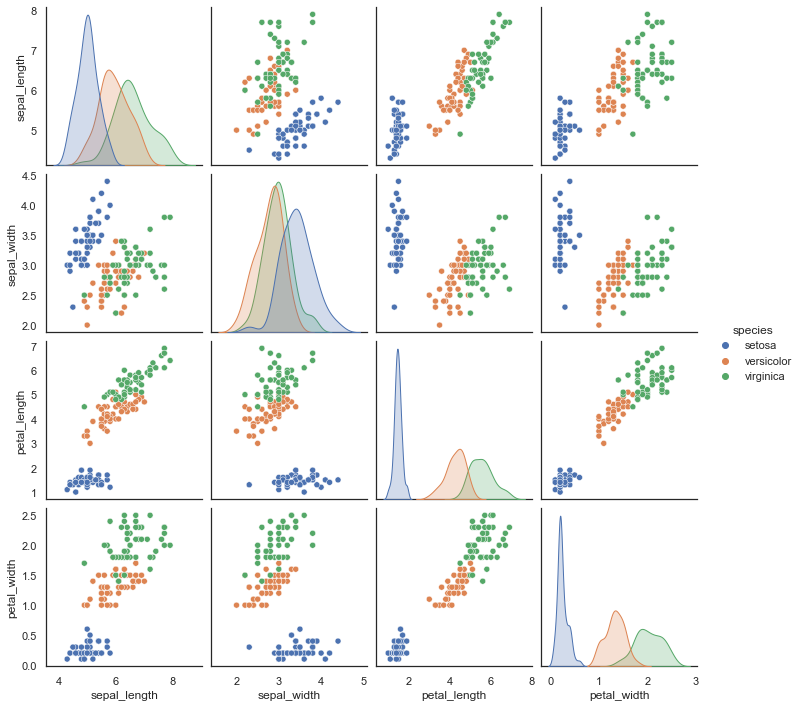

In [103]:
sns.set(style="white", color_codes=True)
iris = sns.load_dataset('iris')#导入数据集
sns.pairplot(iris,hue='species') #画出散点图

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict,train_test_split,LeaveOneOut

In [105]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [106]:
print("species",iris["species"].unique())


species ['setosa' 'versicolor' 'virginica']


In [107]:
# iris=iris.drop(iris[iris['species']=='setosa'].index)

In [108]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [109]:
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris["species"]
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [110]:
lr = LogisticRegression(multi_class='multinomial',solver='lbfgs')


In [111]:
y_predict = cross_val_predict(lr,X,y,cv=10)#交叉验证
print('十折交叉验证错误率:',1-metrics.accuracy_score(y,y_predict))#错误率

十折交叉验证错误率: 0.026666666666666616


In [112]:
loo = LeaveOneOut()

In [114]:
accuracy = 0  # 初始化
for train, test in loo.split(X):  # 每次取一个样本
    X_train, y_train = X.iloc[train, :], y.iloc[train]  # 训练集
    X_test = X.iloc[test, :]  # 测试集
    lr.fit(X_train, y_train)  # 训练
    y_predict = lr.predict(X_test)  # 预测
    if y.iloc[test] in y_predict:  # 如果预测结果和测试集一样，则正确率加一
        accuracy += 1
print('留一法错误率：', 1-accuracy / X.shape[0])  # 错误率


留一法错误率： 0.033333333333333326
